## May we predict 'class' (origin?) of those wines 
Supposedly an easy multiclass problem

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

from xgboost import DMatrix, XGBClassifier, train

In [2]:
data = load_wine()

In [3]:
target = data.target

In [4]:
features =pd.DataFrame(data.data)


In [5]:
features.columns = data.feature_names

In [6]:
classes =['0','1','2']

### Split data

In [7]:
X_train, X_test,y_train, y_test= train_test_split(features,target, random_state=2017, stratify=target)

In [8]:
temp_list= [X_train, X_test,y_train, y_test]
for i in temp_list:
    print(i.shape)

(133, 13)
(45, 13)
(133,)
(45,)


In [9]:
dtrain =DMatrix(data=X_train, label=y_train)
dtest= DMatrix(data=X_test , label=y_test)

### Set first param's for model and train first simple model

In [34]:
param = {'max_depth':3,
        'objective': 'multi:softmax',
        'num_class':3}

In [35]:
model = train(param,dtrain)

In [36]:
pred = model.predict(dtest)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.89      0.94        18
           2       0.90      0.75      0.82        12

    accuracy                           0.89        45
   macro avg       0.90      0.88      0.88        45
weighted avg       0.90      0.89      0.89        45



In [37]:
conf_m =confusion_matrix(y_test, pred)
conf_m

array([[15,  0,  0],
       [ 1, 16,  1],
       [ 3,  0,  9]])

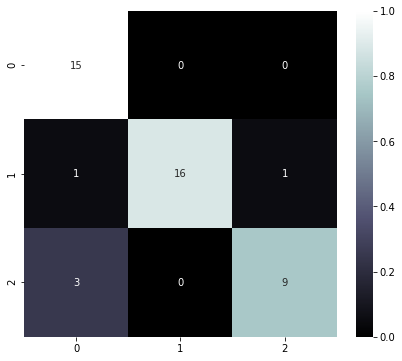

In [38]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        plt.savefig('confusion-matrix.png')

plot_confusion_matrix(conf_m, ['0', '1', '2'])
# 19 values predict as '0'. 15 times right and 4 times wrong. 16 values predict as 1. always right.